In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
submission = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

In [2]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [5]:
submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


<AxesSubplot:>

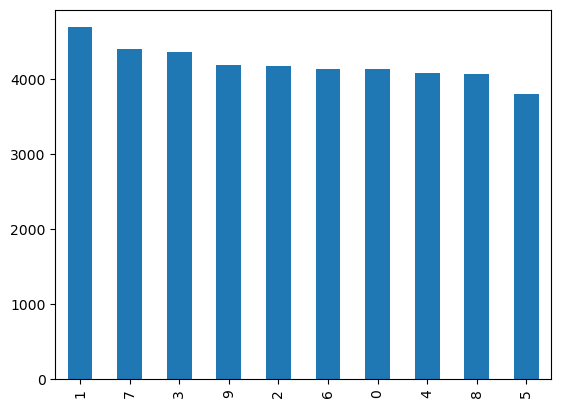

In [8]:
# Lets explore the Target variable
import matplotlib.pyplot as plt
import seaborn as sns

train.label.value_counts().plot(kind = "bar")

In [11]:
# Model
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [13]:
# Initiating Models....
dtree = DecisionTreeClassifier()
xgb = XGBClassifier()
lda = LDA(n_components=9)

In [14]:
# Splitting the Data in X and y
X = train.drop("label", axis = 1)
y = train.label

# Fit and Predict
pred = dtree.fit(X, y).predict(test)

In [15]:
# XGBoost Fit and Predict
pred_xgb = xgb.fit(X, y).predict(test)

In [16]:
# lda 
lda = LDA(n_components=9)

pred_lda = lda.fit(X, y).predict(test)

In [19]:
# Submission
submission["Label"] = pred # Decision Tree Model

In [22]:
submission.to_csv("treemodel.csv", index = False) # 0.85932

In [21]:
submission.drop("label", axis = 1, inplace = True)

In [23]:
# XGB Submission
submission["Label"] = pred_xgb


In [24]:
# export it outside
submission.to_csv("XGBModel.csv", index = False) # 0.974

In [25]:
# LDA
submission["Label"] = pred_lda

submission.to_csv("ldamodel.csv", index = False) # 0.86

In [26]:
# LGBM and CatBoost
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.linear_model import LogisticRegression

lgbm = LGBMClassifier()
cboost = CatBoostClassifier()
lg = LogisticRegression()

In [27]:
pred_lgbm = lgbm.fit(X, y).predict(test)

In [28]:
submission["Label"] = pred_lgbm

submission.to_csv("LGBM_CV.csv", index = False) # 0.973

In [29]:
pred_cboost = cboost.fit(X, y).predict(test)

submission["Label"] = pred_cboost

submission.to_csv("CBOOST_CV.csv", index = False)

Learning rate set to 0.095743
0:	learn: 1.9988456	total: 1.88s	remaining: 31m 13s
1:	learn: 1.7986509	total: 3.84s	remaining: 31m 54s
2:	learn: 1.6463624	total: 5.7s	remaining: 31m 33s
3:	learn: 1.5120112	total: 7.61s	remaining: 31m 34s
4:	learn: 1.4105358	total: 9.5s	remaining: 31m 30s
5:	learn: 1.3221949	total: 11.4s	remaining: 31m 24s
6:	learn: 1.2407474	total: 13.3s	remaining: 31m 28s
7:	learn: 1.1688672	total: 15.2s	remaining: 31m 29s
8:	learn: 1.1136048	total: 17.3s	remaining: 31m 42s
9:	learn: 1.0635293	total: 19.4s	remaining: 32m 1s
10:	learn: 1.0122400	total: 21.4s	remaining: 32m
11:	learn: 0.9623926	total: 23.3s	remaining: 31m 54s
12:	learn: 0.9196919	total: 25.1s	remaining: 31m 48s
13:	learn: 0.8838494	total: 27s	remaining: 31m 43s
14:	learn: 0.8538069	total: 28.9s	remaining: 31m 36s
15:	learn: 0.8197523	total: 30.8s	remaining: 31m 31s
16:	learn: 0.7927067	total: 32.6s	remaining: 31m 26s
17:	learn: 0.7626219	total: 34.5s	remaining: 31m 23s
18:	learn: 0.7335991	total: 36.4s	r

KeyboardInterrupt: 

In [30]:
pred_lg = lg.fit(X, y).predict(test)

submission["Label"] = pred_lg

submission.to_csv("LOGREG_CV.csv", index = False)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
